**Importing Library**

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

**Loading Data**

In [165]:
data = pd.read_csv('data_for_lr.csv')

**Data exploration**

In [166]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


**Data Preprocessing**

Handling Null Values

In [168]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [169]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))


Shape of the dataset = (699, 2)


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


**Splitting Data**

In [171]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


<span style="color:green">Linear Regression</span>


**Forward Propogation**

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [172]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

**Defining Cost Function**

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [173]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

**Gradient Descent for Backpropagation**

Using Chain Rule:

<ul style="list-style-type: none; padding-left: 0;">
  <li><span style="font-weight:bold;">&bull;</span> cost</li>
  <li><span style="font-weight:bold;">&bull;</span> f = f(x)</li>
</ul>
Partial Derivative of cost function w.r.t m **dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c **dcost/dc = dcost/df * df/dc **

Partial Derivatives:

<ul style="list-style-type: none; padding-left: 0;">
  <li><span style="font-weight:bold;">&bull;</span> dc/df = (y - f) * -1</li>
  <li><span style="font-weight:bold;">&bull;</span> df/dw = x</li>
  <li><span style="font-weight:bold;">&bull;</span> df/db = 1</li>
</ul>




In [174]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

**Update the Parameters**

<ul style="list-style-type: none; padding-left: 0;">
  <li><span style="font-weight:bold;">&bull;</span> m = m - (learning_rate * dm)</li>
  <li><span style="font-weight:bold;">&bull;</span> c = c - (learning_rate * dc)</li>
</ul>

In [175]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

**Train the Data**

Sequence of Steps:

<ul style="list-style-type: none; padding-left: 0;">
  <li><span style="font-weight:bold;">&bull;</span> Forward Propagtaion</li>
  <li><span style="font-weight:bold;">&bull;</span> Cost Function</li>
  <li><span style="font-weight:bold;">&bull;</span> Backward Propagation</li>
  <li><span style="font-weight:bold;">&bull;</span> Update Parameters</li>
</ul>





In [185]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

**Training**

Iteration = 1, Loss = 2955.2115150762697


<Figure size 640x480 with 0 Axes>

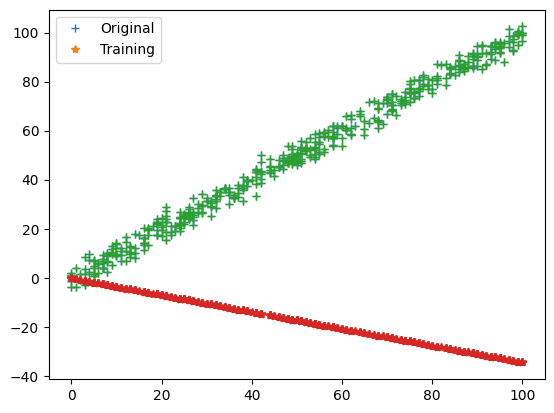

Iteration = 2, Loss = 1342.9191274056575


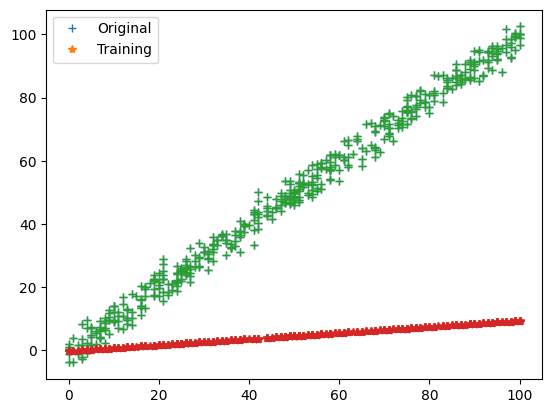

Iteration = 3, Loss = 611.4202852697312


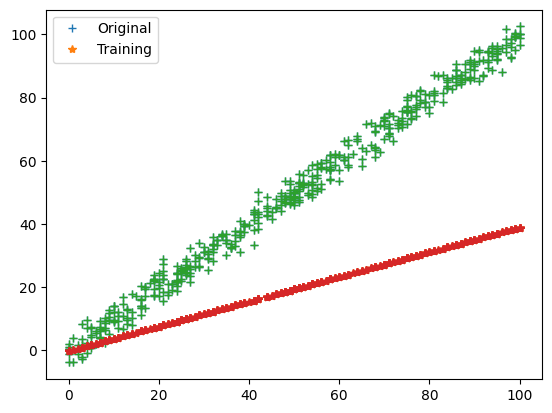

Iteration = 4, Loss = 279.5384503461253


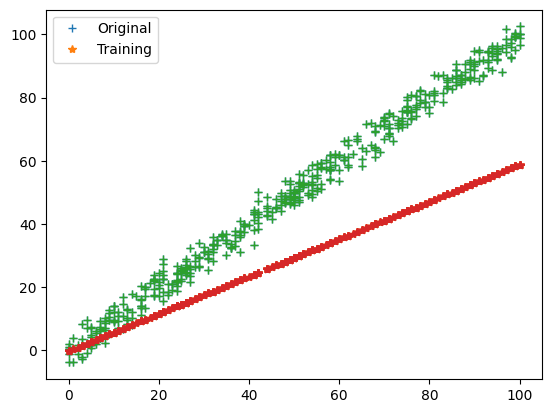

Iteration = 5, Loss = 128.9632942270161


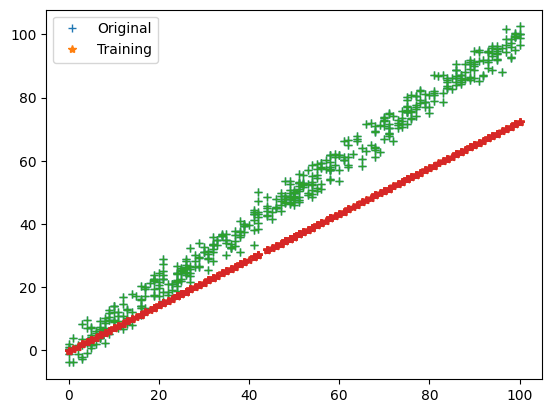

Iteration = 6, Loss = 60.647179104257674


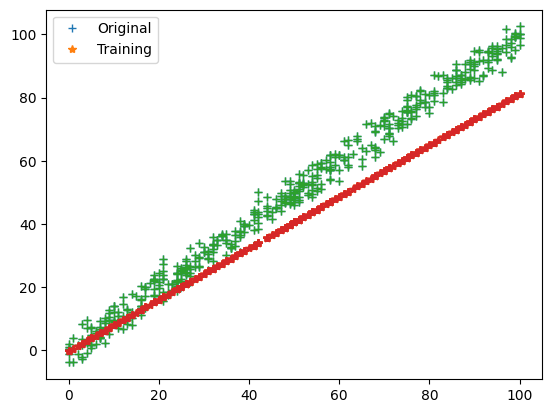

Iteration = 7, Loss = 29.652081995048018


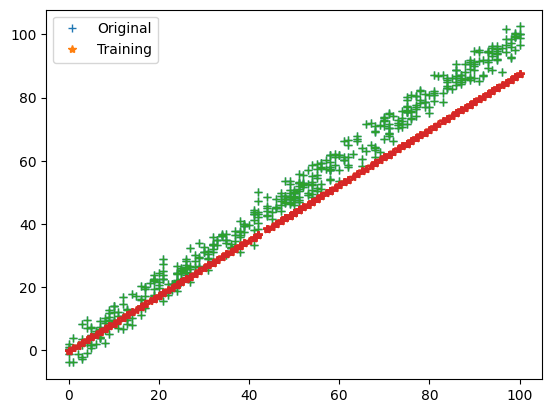

Iteration = 8, Loss = 15.589572096883487


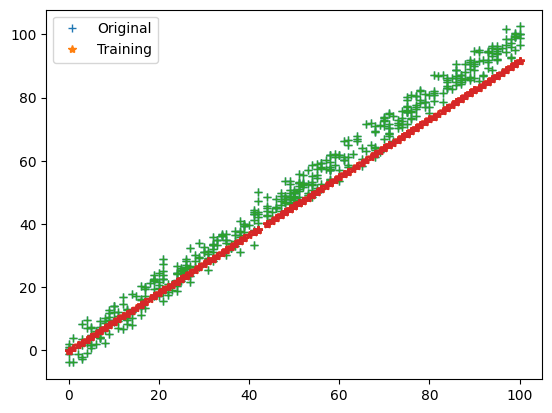

Iteration = 9, Loss = 9.209395771601995


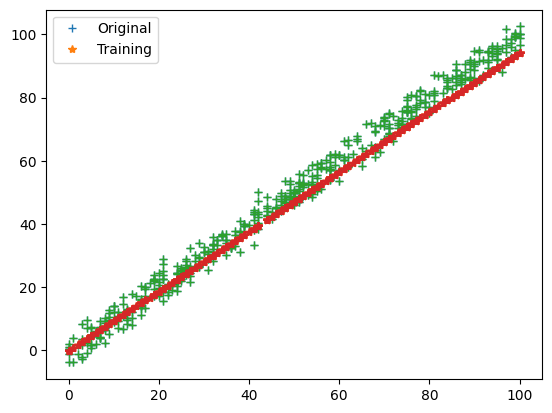

Iteration = 10, Loss = 6.314702697607283


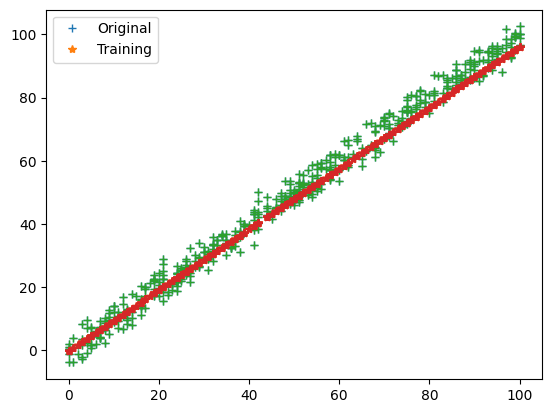

Iteration = 11, Loss = 5.001377235386684


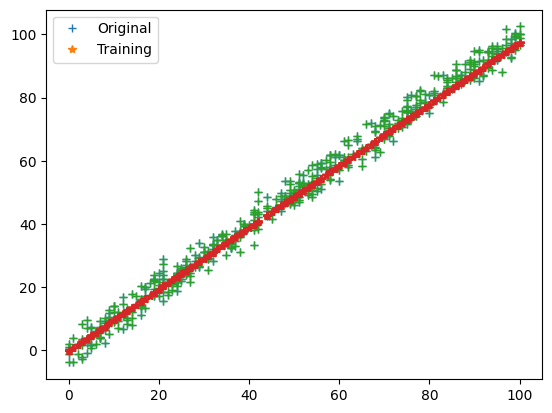

Iteration = 12, Loss = 4.405520010216353


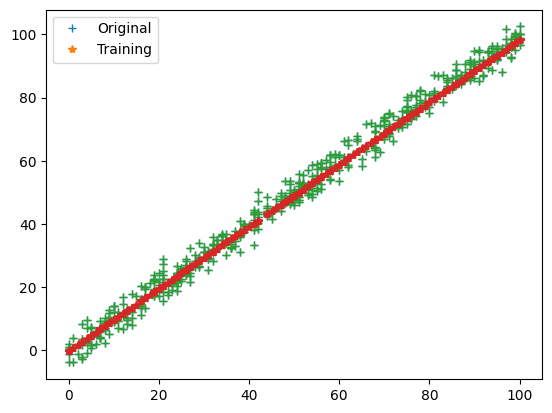

Iteration = 13, Loss = 4.135178918893546


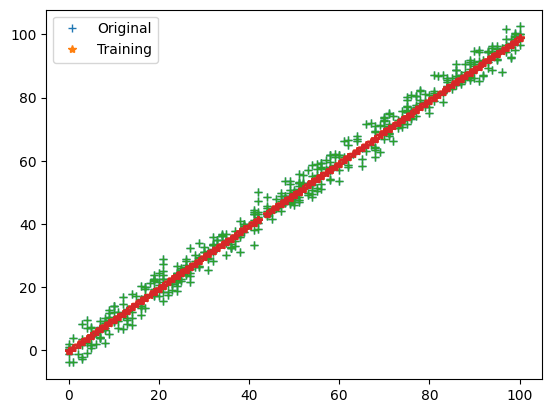

Iteration = 14, Loss = 4.012524858052858


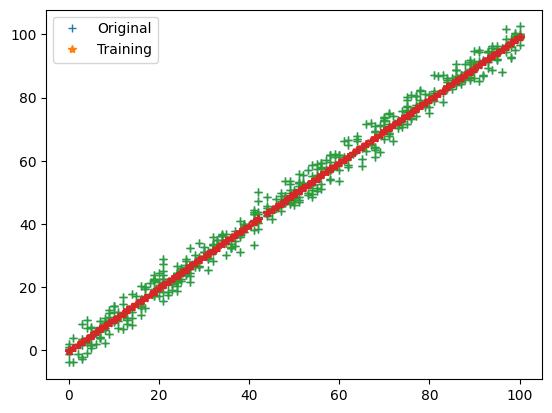

Iteration = 15, Loss = 3.9568765665265633


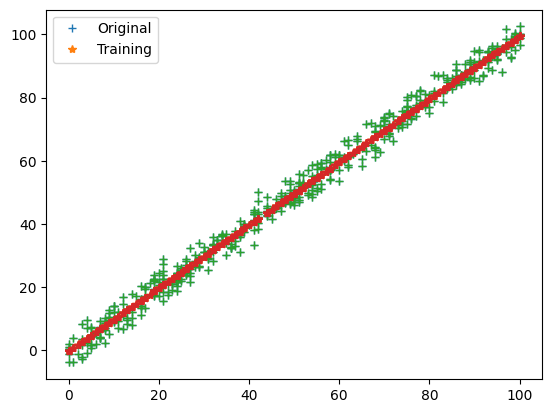

Iteration = 16, Loss = 3.931628866756977


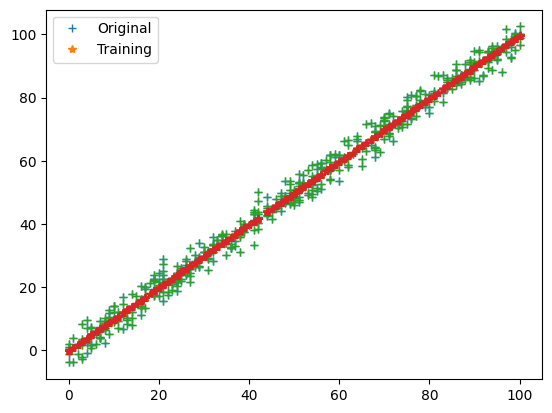

Iteration = 17, Loss = 3.920173949140777


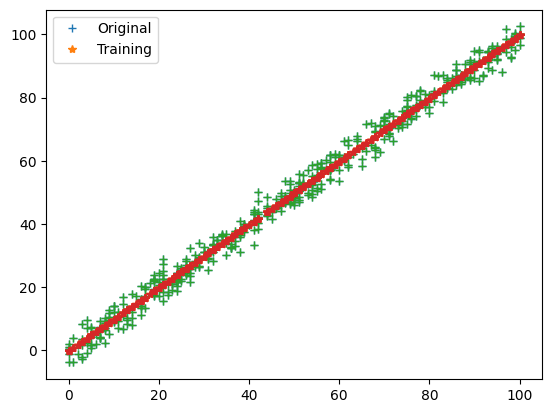

Iteration = 18, Loss = 3.9149768320654377


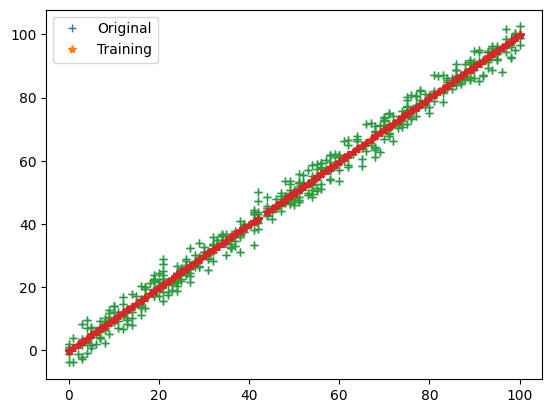

Iteration = 19, Loss = 3.9126188860272997


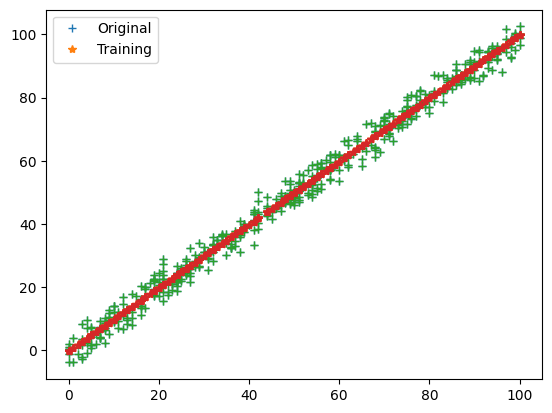

Iteration = 20, Loss = 3.9115490750339403


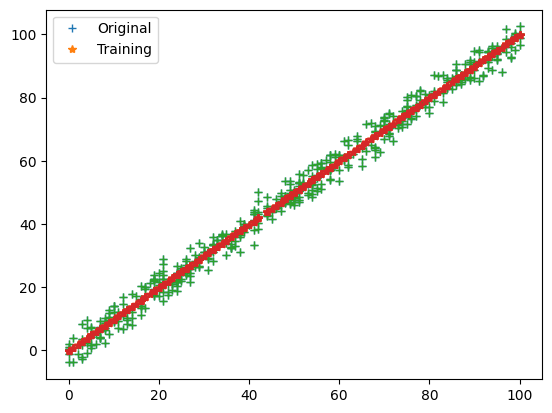

In [186]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

**Cost for test data**

In [189]:
# Calculate predictions for the test dataset
test_predictions = forward_propagation(test_input, parameters)

# Calculate cost function for the test dataset
test_cost = cost_function(test_predictions, test_output)

print("Cost function for test dataset:", test_cost)

Cost function for test dataset: 4.03033938977252
